# Spotify EDA <br>
https://www.kaggle.com/yamaerenay/spotify-datase <br><br>
1. 음악의 특징들간 상관관계 <br>
2. 장르별 음악의 특징 분포 <br>
3. 시간대에 따른 음악 변천사 분석 (큼직한 아티스트들 insight) <br> 
4. 스포티파이 내 popularity

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
# tracks 데이터 불러오기
df = pd.read_csv('./data/tracks.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: './data/tracks.csv'

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [54]:
# 필요없는 컬럼 제거
df.drop(['explicit','id','id_artists','time_signature'],axis=1,inplace=True)
df.head()

name  popularity  duration_ms  \
0                                Carve           6       126903   
1  Capítulo 2.16 - Banquero Anarquista           0        98200   
2   Vivo para Quererte - Remasterizado           0       181640   
3        El Prisionero - Remasterizado           0       176907   
4                  Lady of the Evening           0       163080   

               artists release_date  danceability  energy  key  loudness  \
0              ['Uli']   1922-02-22         0.645  0.4450    0   -13.338   
1  ['Fernando Pessoa']   1922-06-01         0.695  0.2630    0   -22.136   
2  ['Ignacio Corsini']   1922-03-21         0.434  0.1770    1   -21.180   
3  ['Ignacio Corsini']   1922-03-21         0.321  0.0946    7   -27.961   
4      ['Dick Haymes']         1922         0.402  0.1580    3   -16.900   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.4510         0.674            0.7440     0.151    0.127   
1     1       0.9570         0.797            0.0000     0.148    0.655   
2     1       0.0512         0.994            0.0218     0.212    0.457   
3     1       0.0504         0.995            0.9180     0.104    0.397   
4     0       0.0390         0.989            0.1300     0.311    0.196   

     tempo  
0  104.851  
1  102.009  
2  130.418  
3  169.980  
4  103.220

In [55]:
# ms를 second(int)로 변환 (열 추가)
df['duration_sec'] = (df["duration_ms"]/1000).round()
df['duration_sec'] = df["duration_sec"].astype('int64')
df.drop(['duration_ms'],axis=1,inplace=True)
df['duration_sec']

0         127
1          98
2         182
3         177
4         163
         ... 
586667    258
586668    153
586669    188
586670    142
586671    214
Name: duration_sec, Length: 586672, dtype: int64

In [56]:
# 년도만 출력
df['release_date'] = df['release_date'].astype('str')
df['release_date'] = df['release_date'].str[:4]

In [57]:
# 발매일 datetime 변환
df['release_date'] = pd.to_datetime(df['release_date'], format="%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              586601 non-null  object        
 1   popularity        586672 non-null  int64         
 2   artists           586672 non-null  object        
 3   release_date      586672 non-null  datetime64[ns]
 4   danceability      586672 non-null  float64       
 5   energy            586672 non-null  float64       
 6   key               586672 non-null  int64         
 7   loudness          586672 non-null  float64       
 8   mode              586672 non-null  int64         
 9   speechiness       586672 non-null  float64       
 10  acousticness      586672 non-null  float64       
 11  instrumentalness  586672 non-null  float64       
 12  liveness          586672 non-null  float64       
 13  valence           586672 non-null  float64       
 14  temp

<Figure size 1440x720 with 0 Axes>

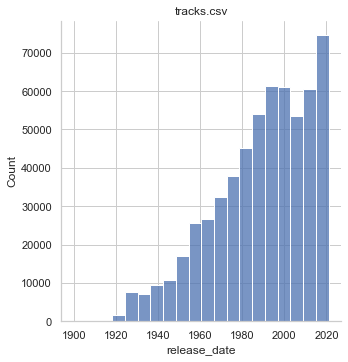

In [115]:
# 발매일에 따른 음원 분포
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.displot(df['release_date'],bins=20)
ax.set(title ="tracks.csv")
plt.savefig('year_count.png', dpi = 300)

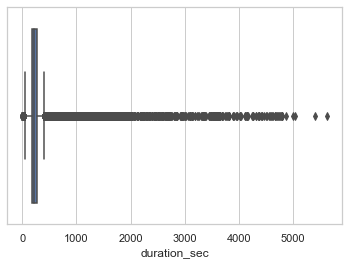

In [61]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["duration_sec"])

<Figure size 1440x720 with 0 Axes>

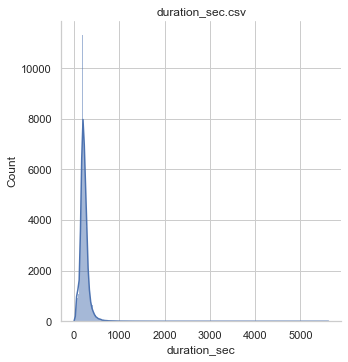

In [60]:
# 발매일에 따른 음원 분포
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.displot(df['duration_sec'], kde=True)
ax.set(title ="duration_sec.csv")
plt.savefig('year_count.png', dpi = 300)

In [62]:
df['duration_sec'].mean()

230.05065181225626

In [119]:
# key, mode 분리
df_category = df[['key','mode']]
df_category

key  mode
0         0     1
1         0     1
2         1     1
3         7     1
4         3     0
...     ...   ...
586667    0     0
586668    0     1
586669    7     0
586670   10     1
586671    6     1

[586672 rows x 2 columns]

In [120]:
# key, mode 삭제 
df.drop(['key','mode'],axis=1,inplace=True)

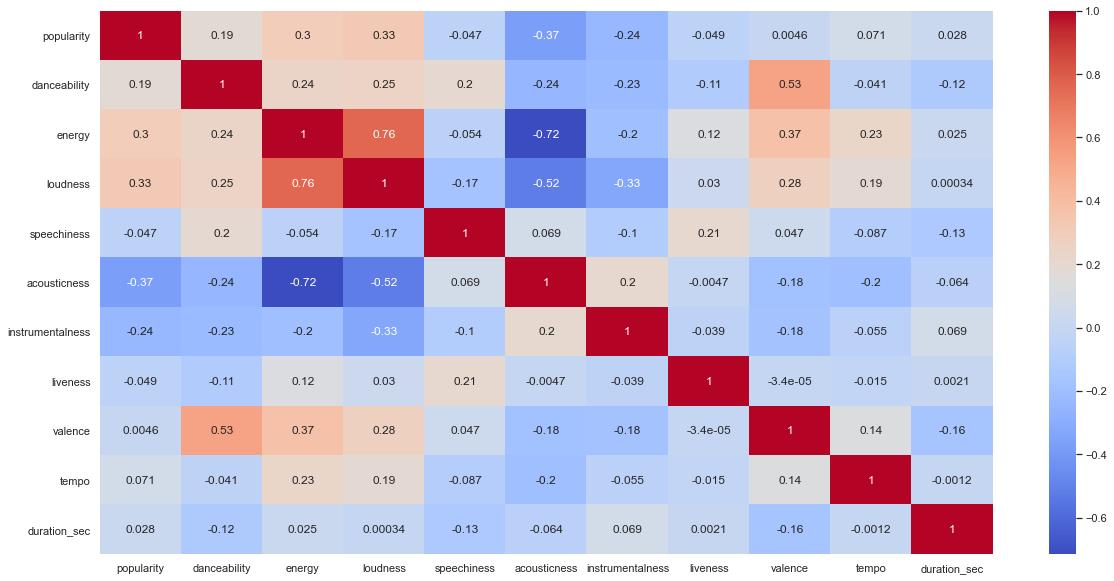

In [108]:
# feature correlation (heatmap)
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig('feature_heatmap.png', dpi = 400)

In [160]:
# key sum값
key = df_category['key'].value_counts()
key

0     74950
7     73779
2     66552
9     65128
5     53614
4     48220
1     41736
11    39132
10    37710
8     33460
6     30856
3     21535
Name: key, dtype: int64

In [142]:
# mode sum값
mode = df_category['mode'].value_counts()
mode

1    386498
0    200174
Name: mode, dtype: int64

In [169]:
# key, mode 파이차트
key_mapping = {0:"C",1:"C♯",2:"D",3:"D♯",4:"E",5:"F",6:"F♯",7:"G",8:"G♯",9:"A",10:"A♯",11:"B"}
key_counts_df = pd.DataFrame(df_category["key"].value_counts())
key_counts_df['key_names'] = key_counts_df.index.to_series().map(key_mapping)

key_labels = key_counts_df['key_names'].values
key_values = key_counts_df['key'].values

mode_mapping = {0:"Minor",1:"Major"}
mode_counts_df = pd.DataFrame(df_category["mode"].value_counts())
mode_counts_df['mode_names'] = mode_counts_df.index.to_series().map(mode_mapping)

mode_labels = mode_counts_df['mode_names'].values
mode_values = mode_counts_df['mode'].values

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=key_labels, values=key_values),row=1, col=1)

fig.add_trace(
    go.Pie(labels=mode_labels, values=mode_values),row=1, col=2)

fig.update_traces(textinfo='percent+label')


fig.update_layout(height=600, width=1200, title="Keys / Modes")
fig.show()

<Figure size 1152x576 with 0 Axes>

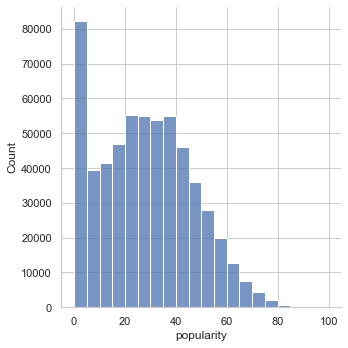

In [271]:
plt.figure(figsize=(16, 8))
sns.displot(df.popularity,bins=20)
ax.set_title('popularity_density')
plt.savefig('popularity_count.png', dpi = 400)

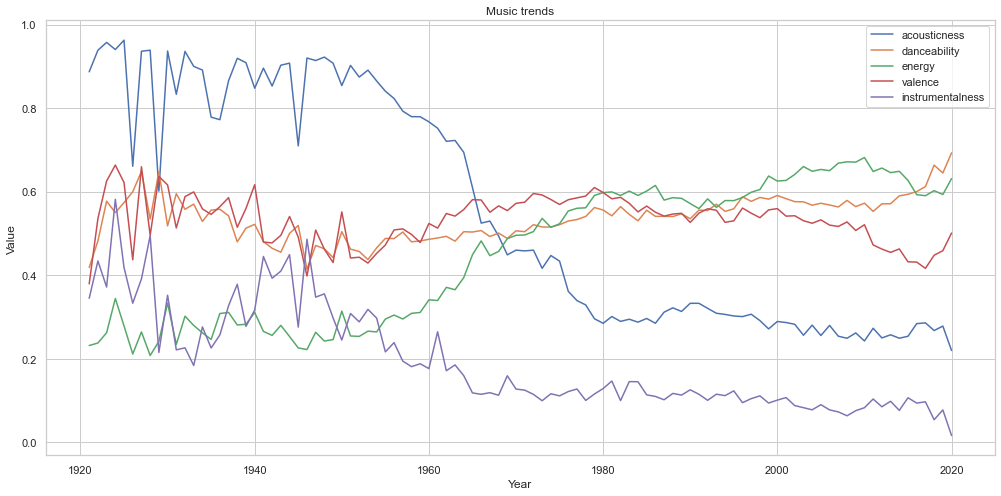

In [200]:
df_year = pd.read_csv('./data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","valence", "instrumentalness"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends.png', dpi = 400)

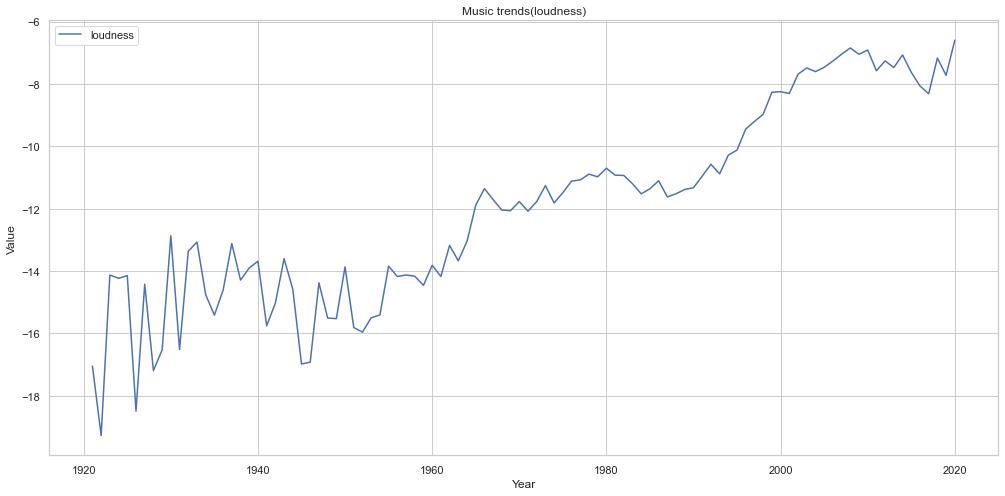

In [201]:
df_year = pd.read_csv('./data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(loudness)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(loudness).png', dpi = 400)

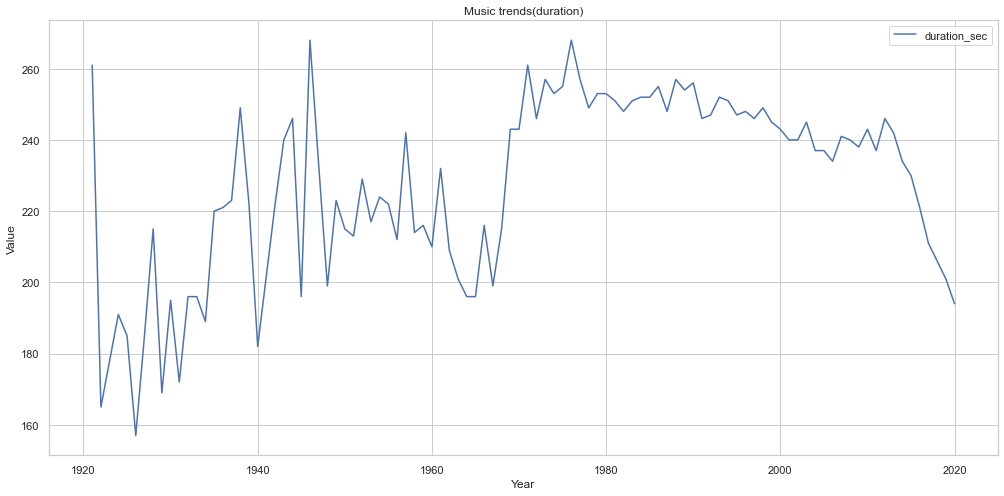

In [206]:
df_year = pd.read_csv('./data/data_by_year_o.csv')

# ms를 second(int)로 변환 (열 추가)
df_year['duration_sec'] = (df_year["duration_ms"]/1000).round()
df_year['duration_sec'] = df_year["duration_sec"].astype('int64')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["duration_sec"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(duration)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(duration).png', dpi = 400)

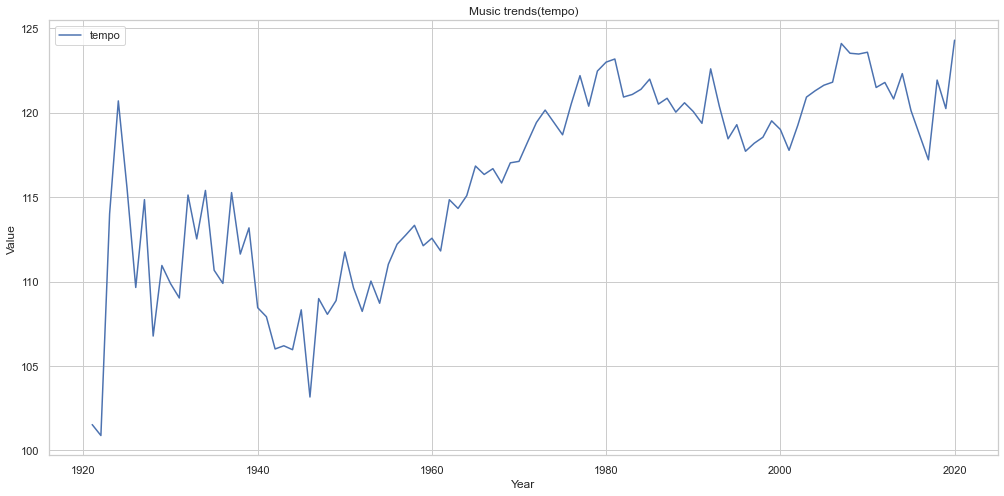

In [250]:
df_year = pd.read_csv('./data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(tempo)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(tempo).png', dpi = 400)

In [17]:
df_genre = pd.read_csv('./data/data_by_genres_o.csv')
df_genre.drop(['key','mode', 'duration_ms', 'liveness', 'speechiness'],axis=1,inplace=True)
df_genre

genres  acousticness  danceability    energy  \
0     21st century classical      0.979333      0.162883  0.071317   
1                      432hz      0.494780      0.299333  0.450678   
2                      8-bit      0.762000      0.712000  0.818000   
3                         []      0.651417      0.529093  0.419146   
4                 a cappella      0.676557      0.538961  0.316434   
...                      ...           ...           ...       ...   
2968                    zolo      0.222625      0.547082  0.610240   
2969                 zouglou      0.161000      0.863000  0.909000   
2970                    zouk      0.263261      0.748889  0.622444   
2971            zurich indie      0.993000      0.705667  0.172667   
2972                  zydeco      0.421038      0.629409  0.609369   

      instrumentalness   loudness       tempo   valence  popularity  
0             0.606834 -31.514333   75.336500  0.103783   27.833333  
1             0.477762 -16.854000  120.285667  0.221750   52.500000  
2             0.876000  -9.180000  133.444000  0.975000   48.000000  
3             0.205309 -12.288965  112.857352  0.513604   20.859882  
4             0.003003 -12.479387  112.110362  0.448249   45.820071  
...                ...        ...         ...       ...         ...  
2968          0.143872 -11.295878  125.494919  0.596155   33.778943  
2969          0.000000  -5.985000  119.038000  0.845000   58.000000  
2970          0.257227 -10.289222  101.965222  0.824111   46.666667  
2971          0.468633 -11.453333   91.278000  0.739000    0.000000  
2972          0.019248  -9.854825  126.366087  0.808544   30.261905  

[2973 rows x 9 columns]

In [18]:
pop = df_genre[df_genre['genres'].str.contains('pop')]
pop.mean()

acousticness          0.363566
danceability          0.587740
energy                0.591264
instrumentalness      0.092689
loudness             -8.666738
tempo               120.562793
valence               0.541915
popularity           45.503919
dtype: float64

In [19]:
rock = df_genre[df_genre['genres'].str.contains('rock')]
rock.mean()

acousticness          0.250290
danceability          0.521813
energy                0.673950
instrumentalness      0.147123
loudness             -8.377117
tempo               125.050473
valence               0.542509
popularity           42.405265
dtype: float64

In [20]:
metal = df_genre[df_genre['genres'].str.contains('metal')]
metal.mean()

acousticness          0.037390
danceability          0.383990
energy                0.861251
instrumentalness      0.255065
loudness             -6.473310
tempo               128.271660
valence               0.331130
popularity           43.648635
dtype: float64

In [21]:
jazz = df_genre[df_genre['genres'].str.contains('jazz')]
jazz.mean()

acousticness          0.628271
danceability          0.529772
energy                0.389689
instrumentalness      0.391621
loudness            -14.144869
tempo               113.289652
valence               0.502553
popularity           32.662257
dtype: float64

In [22]:
hiphop = df_genre[df_genre['genres'].str.contains('hip')]
hiphop.mean()

acousticness          0.252475
danceability          0.663802
energy                0.650354
instrumentalness      0.043278
loudness             -7.382390
tempo               116.465270
valence               0.554601
popularity           48.990553
dtype: float64

In [23]:
classical = df_genre[df_genre['genres'].str.contains('classical')]
classical.mean()

acousticness          0.902761
danceability          0.325826
energy                0.159784
instrumentalness      0.619784
loudness            -22.448363
tempo               103.062530
valence               0.235408
popularity           27.924763
dtype: float64

In [26]:
k_pop = df_genre[df_genre['genres'].str.contains('k-pop')]
ck_pop.mean()

acousticness          0.211184
danceability          0.654756
energy                0.712394
instrumentalness      0.018317
loudness             -5.304191
tempo               119.793920
valence               0.563548
popularity           60.874437
dtype: float64

In [28]:
genres_clear = pd.DataFrame({'pop' : rock.mean(), 'jazz' : jazz.mean(), 'classical' : classical.mean(), 'rock' : rock.mean(), 'hiphop' : hiphop.mean(), 'k-pop' : k_pop.mean()})
genres_clear = genres_clear.T
genres_clear

acousticness  danceability    energy  instrumentalness   loudness  \
pop            0.250290      0.521813  0.673950          0.147123  -8.377117   
jazz           0.628271      0.529772  0.389689          0.391621 -14.144869   
classical      0.902761      0.325826  0.159784          0.619784 -22.448363   
rock           0.250290      0.521813  0.673950          0.147123  -8.377117   
hiphop         0.252475      0.663802  0.650354          0.043278  -7.382390   
k-pop          0.211184      0.654756  0.712394          0.018317  -5.304191   

                tempo   valence  popularity  
pop        125.050473  0.542509   42.405265  
jazz       113.289652  0.502553   32.662257  
classical  103.062530  0.235408   27.924763  
rock       125.050473  0.542509   42.405265  
hiphop     116.465270  0.554601   48.990553  
k-pop      119.793920  0.563548   60.874437

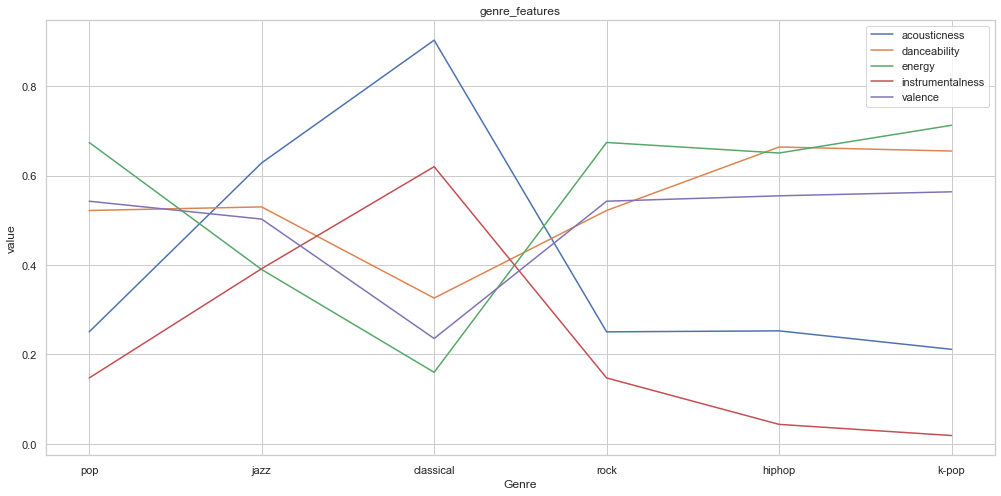

In [29]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_features')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres1.png', dpi = 400)

Text(0.5, 0, 'Genre')

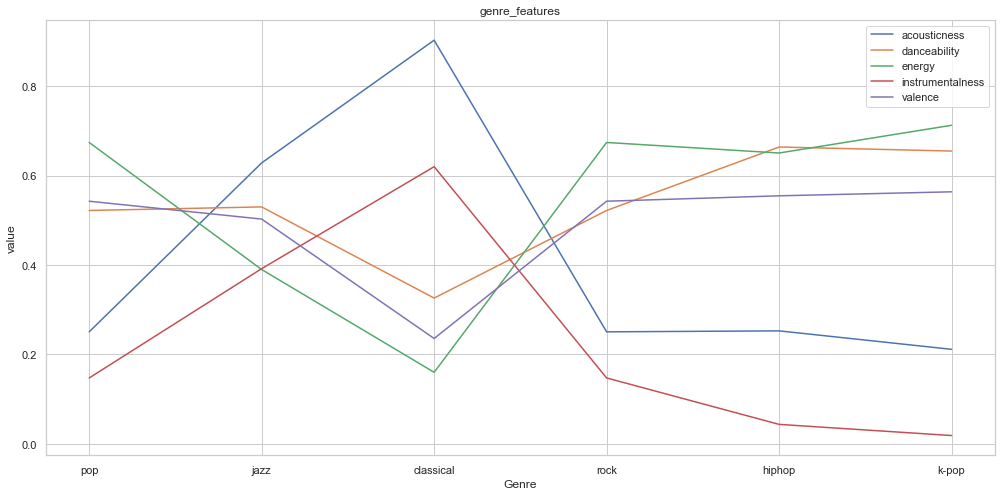

In [30]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_features')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

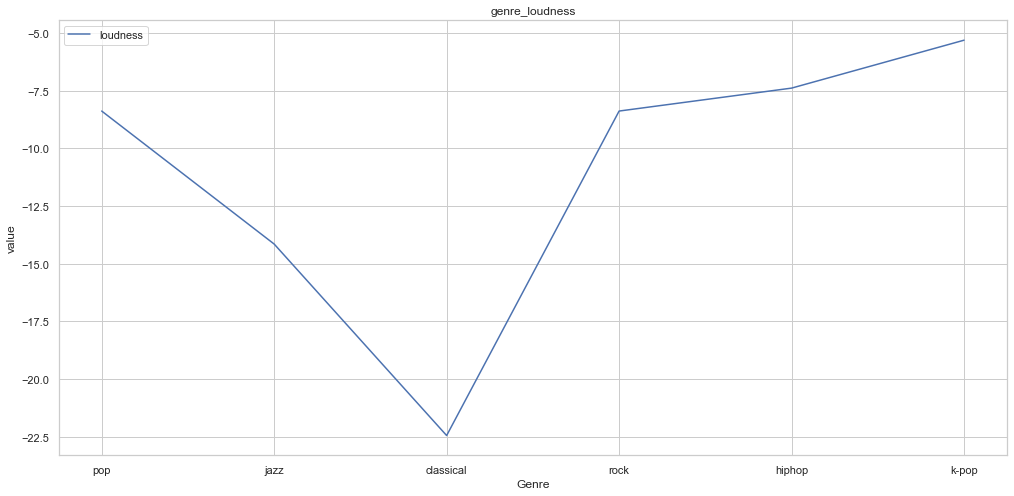

In [31]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['loudness']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_loudness')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres2.png', dpi = 400)

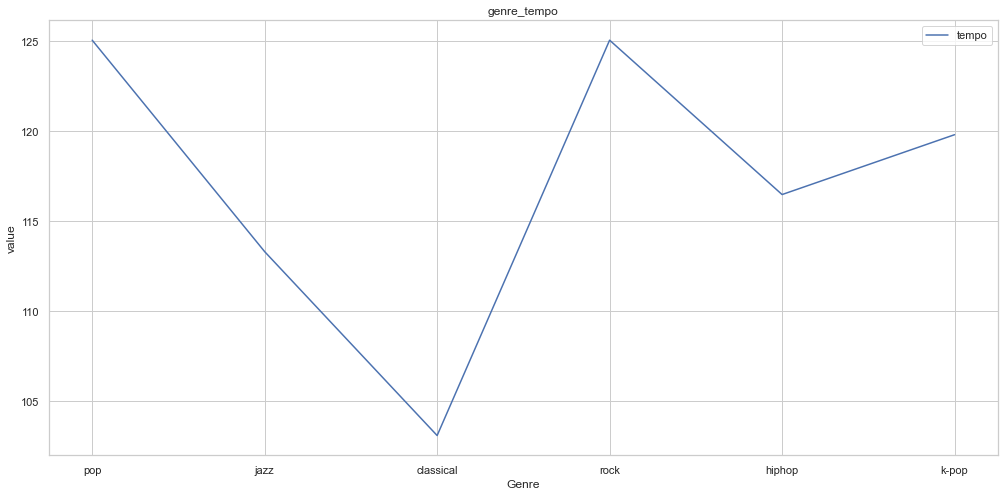

In [32]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['tempo']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_tempo')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres3.png', dpi = 400)

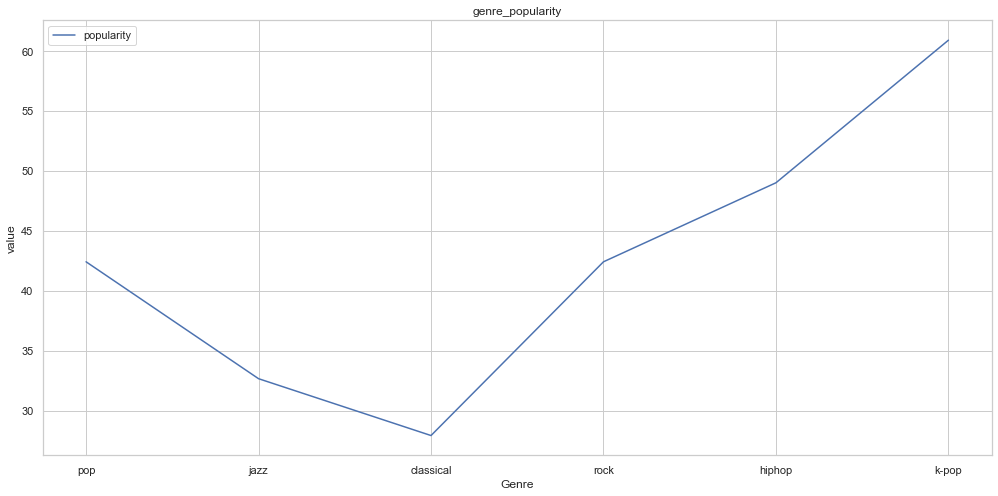

In [33]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['popularity']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_popularity')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres4.png', dpi = 400)

In [ ]:
df_artist = pd.read_csv('./data/data_by_artist_o.csv')
df_artist["artists"] = df_artist["artists"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_artist
# 너무 오래걸림ㅠ

C:\Users\Chromis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']"),
  Text(1, 0, "['Los Legendarios', 'Wisin', 'Jhay Cortez']"),
  Text(2, 0, "['Bad Bunny', 'ROSALÍA']"),
  Text(3, 0, "['Nathan Evans', '220 KID', 'Billen Ted']"),
  Text(4, 0, "['Travis Scott', 'HVME']"),
  Text(5, 0, "['Rochy RD', 'Myke Towers', 'Nicki Nicole']"),
  Text(6, 0, "['MEDUZA', 'Dermot Kennedy']"),
  Text(7, 0, "['Bad Bunny', 'Jhay Cortez']"),
  Text(8, 0, "['Saweetie', 'Doja Cat']"),
  Text(9, 0, "['Maroon 5', 'Megan Thee Stallion']")])

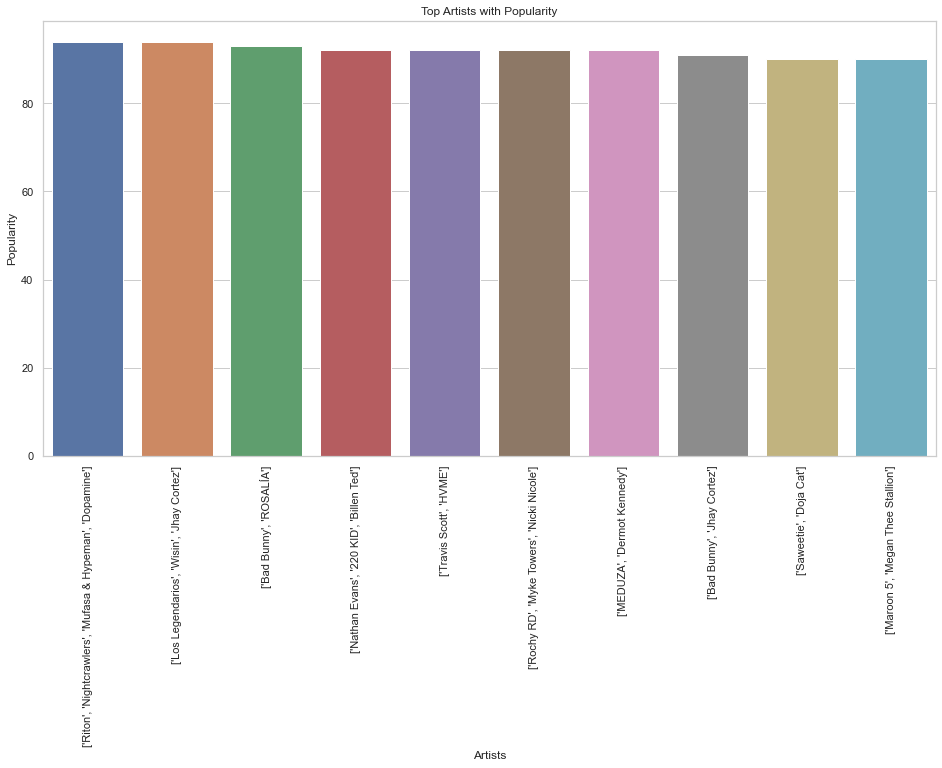

In [10]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 400)

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 400)

In [46]:
df_artist = pd.read_csv('./data/data_by_artist_o.csv')
df_artist

genres  \
0                                         ['show tunes']   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
28675                                                 []   
28676  ['c-pop', 'classic cantopop', 'classic mandopo...   
28677                                                 []   
28678            ['chinese indie', 'chinese indie rock']   
28679                             ['classic korean pop']   

                                                 artists  acousticness  \
0                       "Cats" 1981 Original London Cast      0.590111   
1                              "Cats" 1983 Broadway Cast      0.862538   
2            "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3         "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4      "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   
...                                                  ...           ...   
28675                                                麥志誠      0.512000   
28676                                                黃品源      0.541000   
28677                                                黃國隆      0.785455   
28678                                                 黑豹      0.381000   
28679                                                조정현      0.568000   

       danceability    duration_ms    energy  instrumentalness  liveness  \
0          0.467222  250318.555556  0.394003          0.011400  0.290833   
1          0.441731  287280.000000  0.406808          0.081158  0.315215   
2          0.348286  328920.000000  0.286571          0.024593  0.325786   
3          0.425074  262890.962963  0.245770          0.073587  0.275481   
4          0.467143  270436.142857  0.488286          0.009400  0.195000   
...             ...            ...       ...               ...       ...   
28675      0.356000  198773.000000  0.306000          0.008970  0.108000   
28676      0.578000  293840.000000  0.334000          0.000006  0.067500   
28677      0.570818  174582.727273  0.148400          0.000083  0.142191   
28678      0.353000  316160.000000  0.686000          0.000000  0.056800   
28679      0.447000  237688.000000  0.215000          0.000001  0.064900   

        loudness  speechiness       tempo   valence  popularity  key  mode  \
0     -14.448000     0.210389  117.518111  0.389500   38.333333    5     1   
1     -10.690000     0.176212  103.044154  0.268865   30.576923    5     1   
2     -15.230714     0.118514   77.375857  0.354857   34.857143    0     1   
3     -15.639370     0.123200   88.667630  0.372030   34.851852    0     1   
4     -10.236714     0.098543  122.835857  0.482286   43.000000    5     1   
...          ...          ...         ...       ...         ...  ...   ...   
28675 -10.119000     0.027700  150.049000  0.328000   35.000000   10     1   
28676 -11.974000     0.026700  135.934000  0.243000   48.000000    9     0   
28677 -21.610091     0.054355  119.586273  0.741273   23.000000    5     1   
28678  -9.103000     0.039500  200.341000  0.352000   35.000000   11     1   
28679 -16.478000     0.027200   71.979000  0.177000   31.000000   10     1   

       count  
0          9  
1         26  
2          7  
3         27  
4          7  
...      ...  
28675      2  
28676      2  
28677     11  
28678      2  
28679      2  

[28680 rows x 16 columns]

In [16]:
BTS = df_artist[df_artist['artists'] == 'BTS']
BTS.head()

genres artists  acousticness  danceability  \
1971  ['k-pop', 'k-pop boy group']     BTS      0.117036      0.619079   

        duration_ms    energy  instrumentalness  liveness  loudness  \
1971  228262.290323  0.768387          0.000059  0.204243 -4.644143   

      speechiness       tempo   valence  popularity  key  mode  count  
1971     0.130704  124.428183  0.528895   68.448029    1     0    279

In [35]:
Beatles = df_artist[df_artist['artists'] == 'The Beatles']
Beatles.head()

genres      artists  \
24346  ['beatlesque', 'british invasion', 'classic ro...  The Beatles   

       acousticness  danceability    duration_ms    energy  instrumentalness  \
24346      0.359534      0.522404  174591.257038  0.546576          0.052255   

       liveness  loudness  speechiness       tempo   valence  popularity  key  \
24346  0.221973 -9.687188     0.053337  121.252759  0.619537   47.203182    0   

       mode  count  
24346     1    817

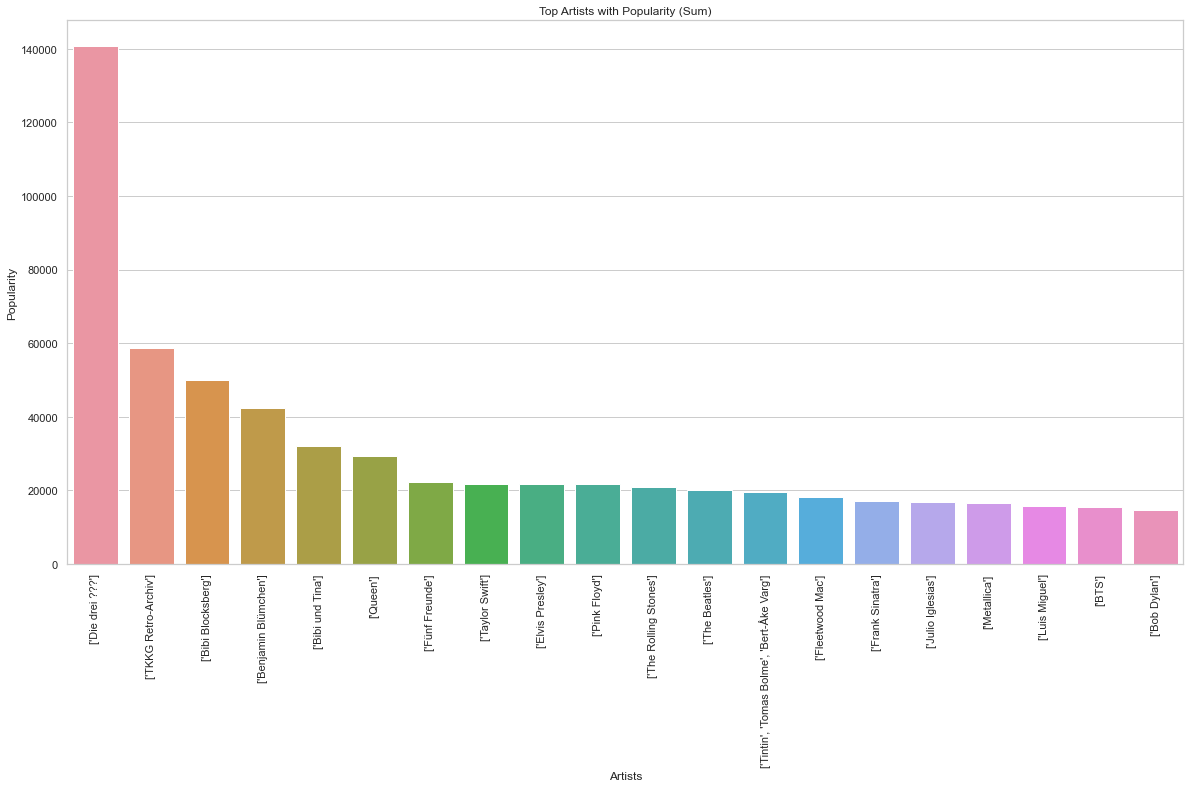

In [51]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity (Sum)')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 500)